In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [108]:
img_Letter = np.array(Image.open("en.jpg"))
img_Nature = np.array(Image.open("nature.jpg"))

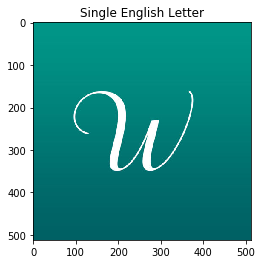

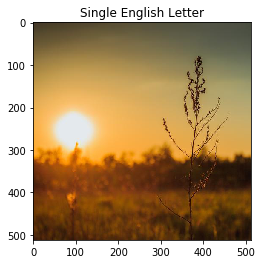

In [171]:
plt.title("Single English Letter")
plt.imshow(img_Letter)
plt.show()

plt.title("Nature")
plt.imshow(img_Nature)
plt.show()

In [175]:
def rotate(data, degree, method):
    degree = degree*(-1)
    cos = np.cos((2*np.pi*degree)/360)
    sin = np.sin((2*np.pi*degree)/360)
    
    witdh = data.shape[0]
    height = data.shape[1]
    #
    # 0,0   1,0
    # 0,1   1,1
    #
    # new witdh  = (x1*cos-y0*sin)-(x0*cos-y1*sin)
    # new height = (x1*sin+y1*cos)
    nw = np.around(np.abs(data.shape[1]*sin - data.shape[0]*cos)).astype(int)
    nh = np.around(np.abs(data.shape[1]*cos - data.shape[0]*sin)).astype(int)
    newImg = np.zeros((nw, nh, 3))
    if(method == "NN"): #Nearest Neighbor
        for i in range(0, newImg.shape[0]):
            for j in range(-256, newImg.shape[1]-256):
                for k in range(0, newImg.shape[2]):
                    x = i*cos + j*sin
                    y = j*cos - i*sin
                    z = k
                    x = np.around(x).astype(int)
                    y = np.around(y).astype(int)
                    if(x>511 or x<0 or y>511 or y<0):
                        continue
                    newImg[i][j+256][k]=data[x][y][z]
    if(method == "BI"): #Bilinear Interpolation
        for i in range(0, newImg.shape[0]):
            for j in range(-256, newImg.shape[1]-256):
                for k in range(0, newImg.shape[2]):
                    x = i*cos + j*sin
                    y = j*cos - i*sin
                    z = k
                    if(x>511 or x<0 or y>511 or y<0):
                        continue
                    x = np.around(x).astype(int)
                    y = np.around(y).astype(int)
                    xa = np.floor(x).astype(int)
                    ya = np.floor(y).astype(int)
                    xb = np.ceil(x).astype(int)
                    yb = np.ceil(y).astype(int)
                    #  f(x1) = f(0，0) + d1 * (f(1，0) – f(0，0))
                    #  f(x2) = f(0，1) + d1 * (f(1，1) – f(0，1))
                    #  f(x，y)= f(x1)+ d3 * (f(x1)- f(x2))
                    #  d1 = x-xa, d3 = y-ya
                    x1 = int(data[xa][ya][z]) + (y-ya)*int(data[xa][yb][z]-data[xa][ya][z])
                    x2 = int(data[xb][ya][z]) + (y-ya)*int(data[xb][yb][z]-data[xb][ya][z])
                    newImg[i][j+256][k] = x1 + (x-xa)*(x2-x1)
    return newImg.astype(np.uint8)

-30 443.4050067376326 -255.99999999999997 699 699
-30 443.4050067376326 -255.99999999999997 699 699


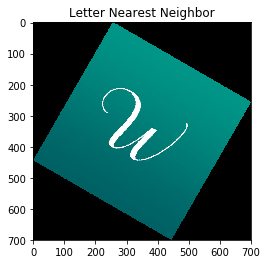

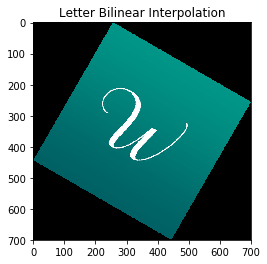

In [178]:
Letter_NN = rotate(img_Letter, 30, "NN")
Letter_BI = rotate(img_Letter, 30, "BI")
plt.title("Letter Nearest Neighbor")
plt.imshow(Letter_NN)
plt.show()

plt.title("Letter Bilinear Interpolation")
plt.imshow(Letter_BI)
plt.show()

-30 443.4050067376326 -255.99999999999997 699 699
-30 443.4050067376326 -255.99999999999997 699 699


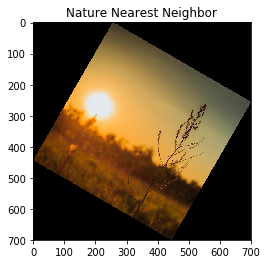

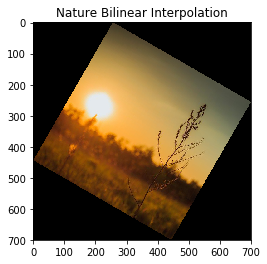

In [179]:
Nature_NN = rotate(img_Nature, 30, "NN")
Nature_BI = rotate(img_Nature, 30, "BI")
plt.title("Nature Nearest Neighbor")
plt.imshow(Nature_NN)
plt.show()

plt.title("Nature Bilinear Interpolation")
plt.imshow(Nature_BI)
plt.show()

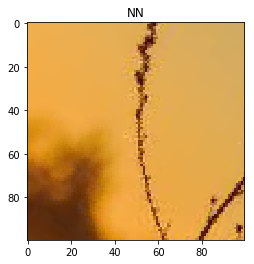

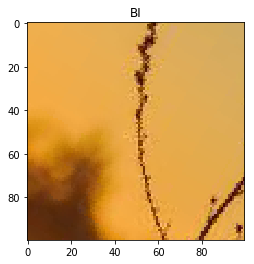

In [198]:
# Different between NN and BI
n=np.zeros((100,100,3))
for i in range(350, 450):
    for j in range(350, 450):
        for k in range(0,Nature_NN.shape[2]):
            n[i-350][j-350][k]=Nature_NN[i][j][k]

b=np.zeros((100,100,3))
for i in range(350, 450):
    for j in range(350, 450):
        for k in range(0,Nature_BI.shape[2]):
            b[i-350][j-350][k]=Nature_BI[i][j][k]

plt.title("NN")            
plt.imshow(n.astype(np.uint8))
plt.show()
plt.title("BI")            
plt.imshow(b.astype(np.uint8))
plt.show()